In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [84]:
df = pd.read_csv("data_cleaned.csv")
df.head()

,imgLink,title,year,director,genre,country,plot,IMDb
0,//upload.wikimedia.org/wikipedia/ru/thumb/b/b2...,Жанна д’Арк,1900,Жорж Мельес,"Драма,Исторический фильм",Франция,"Жанне видится Святой Николай, и Жанна в недоум...",0132251
1,//upload.wikimedia.org/wikipedia/commons/thumb...,Озадаченный Шерлок Холмс,1900,Артур Марвин,"Детективный фильм,Комедия,Мистика",США,"Шерлок Холмс входит в гостиную и обнаруживает,...",0291476
2,//upload.wikimedia.org/wikipedia/commons/thumb...,Самый невозможный способ лечь спать,1900,Жорж Мельес,"Фантастика,Комедия",Франция,"Мужчина входит в гостиницу, в свой номер. Он с...",0225583
3,//upload.wikimedia.org/wikipedia/commons/thumb...,Современный спиритуализм,1900,Жорж Мельес,Немое кино,Франция,Комик в пальто и цилиндре собирается раздеться...,0227536
4,//upload.wikimedia.org/wikipedia/commons/thumb...,Фауст и Маргарита,1900,Эдвин Стэнтон Портер,Фэнтези,США,Мефистофель в обличье рыцаря предлагает Фаусту...,0000301


In [85]:
df.describe()

,year
count,21827.000000
mean,1984.384570
std,26.658955
min,1900.000000
25%,1967.000000
50%,1989.000000
75%,2007.000000
max,2115.000000


In [86]:
df = df.loc[df['year'] != 2115]

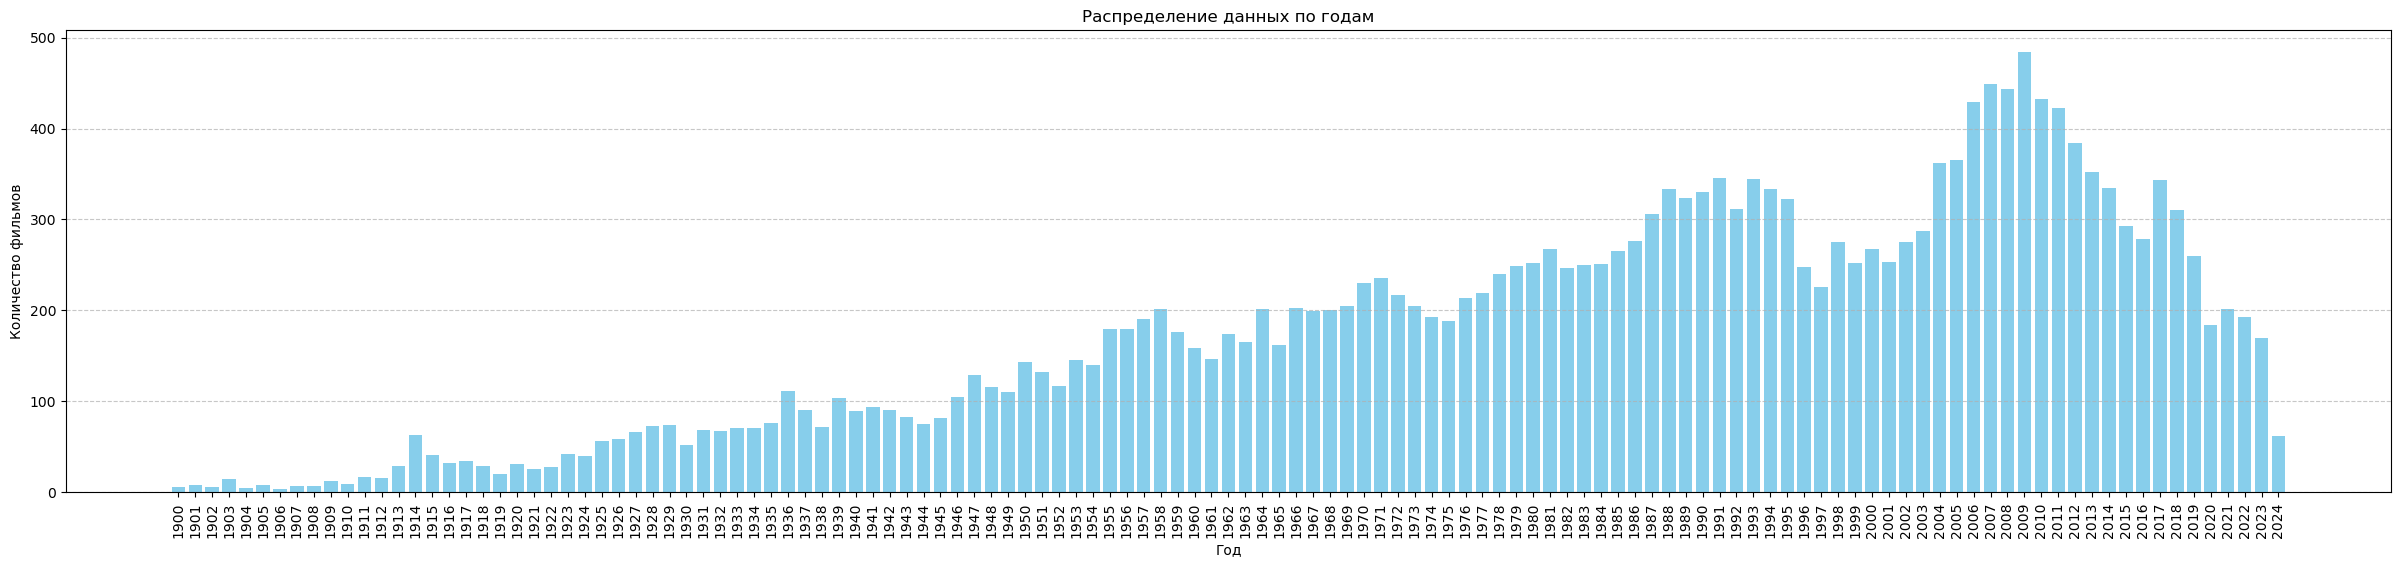

In [87]:
year_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(30, 6))
plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.title('Распределение данных по годам')
plt.xticks(year_counts.index, rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

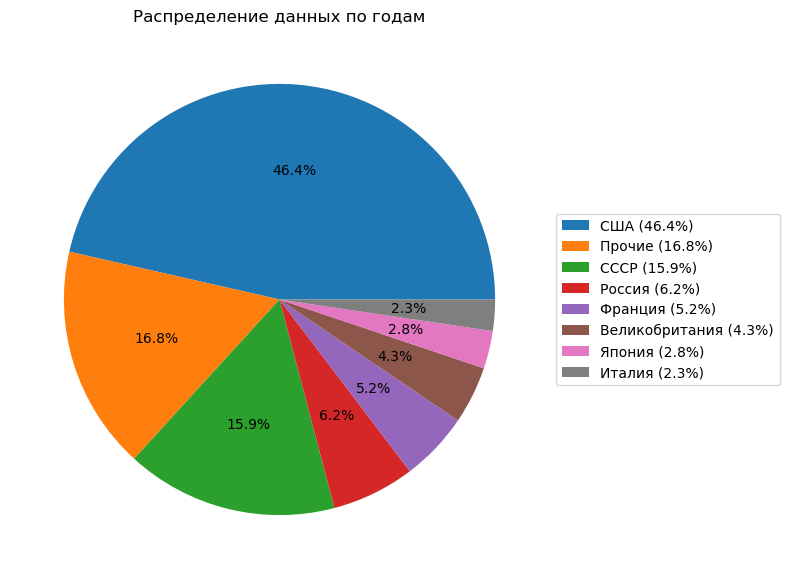

In [88]:
country_counts = df['country'].value_counts()


other_countries = country_counts[country_counts / country_counts.sum() < 0.02].index
df['country'] = df['country'].replace(other_countries, 'Прочие')


country_counts = df['country'].value_counts()


percentages = country_counts / country_counts.sum() * 100


sorted_countries = country_counts.index[np.argsort(percentages)[::-1]]
sorted_country_counts = country_counts.loc[sorted_countries]


plt.figure(figsize=(7, 7))
patches, texts, autotexts = plt.pie(sorted_country_counts, autopct='%1.1f%%')
plt.title('Распределение данных по годам')
plt.ylabel('')


labels = [f'{i} ({j:.1f}%)' for i, j in zip(sorted_country_counts.index, percentages.loc[sorted_countries])]
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [89]:
# Вывод информации о режиссерах
director_counts = df.groupby('director')['title'].count().sort_values(ascending=False)

director_info = pd.DataFrame({'amount': director_counts})

director_info.describe()

,amount
count,9424.000000
mean,2.316002
std,3.046614
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,60.000000


In [90]:
top_directors = director_info.nlargest(10,'amount')
top_directors

,amount
director,
Чжан Чэ,60
Ёдзи Ямада,60
Альфред Хичкок,50
Вуди Аллен,43
Джон Форд,39
Чарли Чаплин,38
Майкл Кёртис,36
Ясудзиро Одзу,34
Сидни Люмет,32


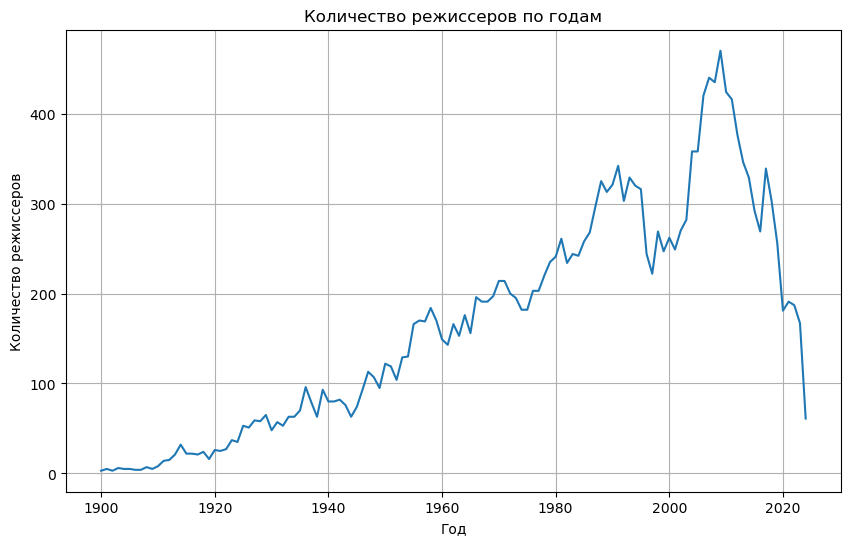

In [91]:
directors_per_year = df.groupby('year')['director'].nunique()

# Построить график
plt.figure(figsize=(10, 6))
directors_per_year.plot(linestyle='-')
plt.title('Количество режиссеров по годам')
plt.xlabel('Год')
plt.ylabel('Количество режиссеров')
plt.grid(True)
plt.show()